#spam or ham mail_model

#about the dataset

About the Dataset
The csv file contains 5772 rows, each row for each email. There are 2 columns. The first column indicates Email name. The name has been set with numbers and not recipients' name to protect privacy. The last column has the labels for prediction : 1 for spam, 0 for not spam. The remaining 3000 columns are the 3000 most common words in all the emails, after excluding the non-alphabetical characters/words. For each row, the count of each word(column) in that email(row) is stored in the respective cells. Thus, information regarding all 5172 emails are stored in a compact dataframe rather than as separate text files.



#Exploratory Data Analytics / Root Cause Analytics
#Domain Exploration
Understand the relevant business process, business impact Common challenges and beleifs Sources of data and external factors

#Data Collection and Data Exploration
Collect data from multiple units of business, prepare the dataset Perform a generic exploration on data to identify common challenges in data quality

#Data Cleaning
Handling duplicates, unwanted columns, missing values, outliers

#EDA / RCA
Data Visualization

Univariate Analysis, Bivariate Analysis, Multivariate Analysis, Statistical methods

#Correlation Analysis
 ANOVA, Chi Square Test,

# 1. data collection and data exploration

In [66]:
#import all library that required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# load the dataset into the dataframe
df=pd.read_csv("/content/mail_data.csv")

In [68]:
# this function is view the first five rows of dataset
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
# this function will show the size of data set
df.shape

(5572, 2)

# data cleaning

In [70]:
# this function will replace all the null value in dataset with the empty string
df1=df.where(pd.notnull(df),'')

In [71]:
df1.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


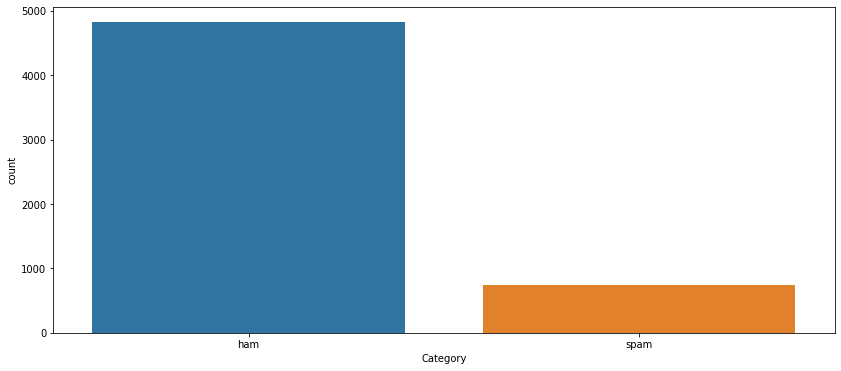

In [72]:
plt.figure(figsize=(14,6))
sns.countplot(df["Category"])
plt.show()

#labelencoding

In [73]:
# this function will replace ham mail as 1 and spam mail as 0
df1["Category"].replace('ham',1,inplace=True)
df1["Category"].replace('spam',0,inplace=True)

In [74]:
df1.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


split the dataset into x and y

In [75]:
# below code is to separate the indepence variable as x and depence variable as y
x=df1["Message"]

In [76]:
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [77]:
y=df1["Category"]

In [78]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

split the dataset into the training and testing dataset

In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [80]:
x_train.shape

(4457,)

In [81]:
x_test.shape

(1115,)

#feature extraction

In [82]:
# the function TfidfVectorizer will convert the message in mail to numeric values beacause the computer will understand the number better
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
# the x_train only contain the message so we go to convert them into numeric by TfidfVectorizer -- parameter -- min-df will take  value above 1 and stop_words will the word like is ,are ,was and so on and the message in mail is convert into lowercase 
feature_extraction= TfidfVectorizer(min_df=1,stop_words='english',lowercase= True)
x_train_feature=feature_extraction.fit_transform(x_train)
x_test_feature=feature_extraction.transform(x_test)
  
# the y_train,y_test are numeric value but its show as object for convert them we using astype function  
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [84]:
x_train

1114    No I'm good for the movie, is it ok if I leave...
3589    If you were/are free i can give. Otherwise nal...
3095    Have you emigrated or something? Ok maybe 5.30...
1012          I just got home babe, are you still awake ?
3320                      Kay... Since we are out already
                              ...                        
4931    Hi, the SEXYCHAT girls are waiting for you to ...
3264                              So u gonna get deus ex?
1653    For ur chance to win a £250 cash every wk TXT:...
2607    R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...
2732    Mm feeling sleepy. today itself i shall get th...
Name: Message, Length: 4457, dtype: object

In [85]:
print(x_train_feature)

  (0, 3422)	0.6418008618863358
  (0, 3960)	0.40459749284424307
  (0, 4776)	0.2937599690543961
  (0, 4486)	0.4933198981059812
  (0, 3101)	0.30778739607068667
  (1, 3855)	0.4410710256765374
  (1, 4574)	0.4410710256765374
  (1, 2534)	0.4410710256765374
  (1, 814)	0.4410710256765374
  (1, 4555)	0.4205367990464199
  (1, 2902)	0.2120712188920981
  (2, 3398)	0.5133141633463273
  (2, 1317)	0.34462014146959175
  (2, 432)	0.4077104256374456
  (2, 4294)	0.36445133334144264
  (2, 2503)	0.5133141633463273
  (2, 4776)	0.2349500626979615
  (3, 1138)	0.6489221209014988
  (3, 1160)	0.44843330753299465
  (3, 3378)	0.38536596088088965
  (3, 3118)	0.3618113574629584
  (3, 3778)	0.31367701143832527
  (4, 3805)	1.0
  (5, 3731)	0.6020708068994186
  (5, 7381)	0.7984426989330436
  :	:
  (4454, 348)	0.2816333253882664
  (4454, 110)	0.3000941484572203
  (4454, 2067)	0.25658354936739225
  (4454, 4488)	0.3000941484572203
  (4454, 651)	0.3000941484572203
  (4454, 373)	0.23959800001827322
  (4454, 796)	0.28163332538

# building the model

#Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train_feature,y_train)


LogisticRegression()

#prediction

In [87]:
y_pred=model.predict(x_test_feature)
y_pred.shape

(1115,)

In [88]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

#score

In [89]:
#accuracy_score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print("accuracy_score:", score)

#precision_score
from sklearn.metrics import precision_score
score=precision_score(y_pred,y_test)
print("precision_score:", score)

#recall_score
from sklearn.metrics import recall_score
score=recall_score(y_pred,y_test)
print("recall_score:", score)

#confusion_matrix
from sklearn.metrics import confusion_matrix
score=confusion_matrix(y_pred,y_test)
print("confusion_matrix:", score)



accuracy_score: 0.9668161434977578
precision_score: 0.9989528795811519
recall_score: 0.9636363636363636
confusion_matrix: [[124   1]
 [ 36 954]]


#building the predictive system

In [90]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


#saving the model

In [91]:
import pickle 
result="mail_model.csv"
pickle.dump(model,open("mail_model.sav","wb"))